<a href="https://colab.research.google.com/github/shruti02002/test_demo/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
Numpy: 1.21.6
Pandas: 1.3.5
Matplotlib: 3.2.2
Seaborn: 0.11.2
Scipy: 1.7.3


In [2]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. THE DATA SET

In [4]:
#Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

In [5]:
#start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
#Print the shape of the data
print(data.shape)

(15936, 31)


In [7]:
print(data.describe())

               Time            V1            V2            V3            V4  \
count  15936.000000  15936.000000  15936.000000  15936.000000  15936.000000   
mean   12121.217871     -0.254293      0.277171      0.803852      0.301343   
std     8982.283843      1.843083      1.491497      1.704252      1.491713   
min        0.000000    -28.344757    -40.978852    -27.368650     -5.172595   
25%     3633.500000     -0.970824     -0.286548      0.371671     -0.621215   
50%    10980.000000     -0.318478      0.247437      0.941822      0.231366   
75%    20621.500000      1.161949      0.884689      1.575960      1.180124   
max    27371.000000      1.960497     14.601998      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  15936.000000  15936.000000  15936.000000  15936.000000  15936.000000   
mean      -0.130469      0.112551     -0.150434      0.000687      0.860838   
std        1.382485      1.329406      1.321898    

In [8]:
data= data.sample(frac=0.1, random_state = 1)
print(data.shape)

(1594, 31)


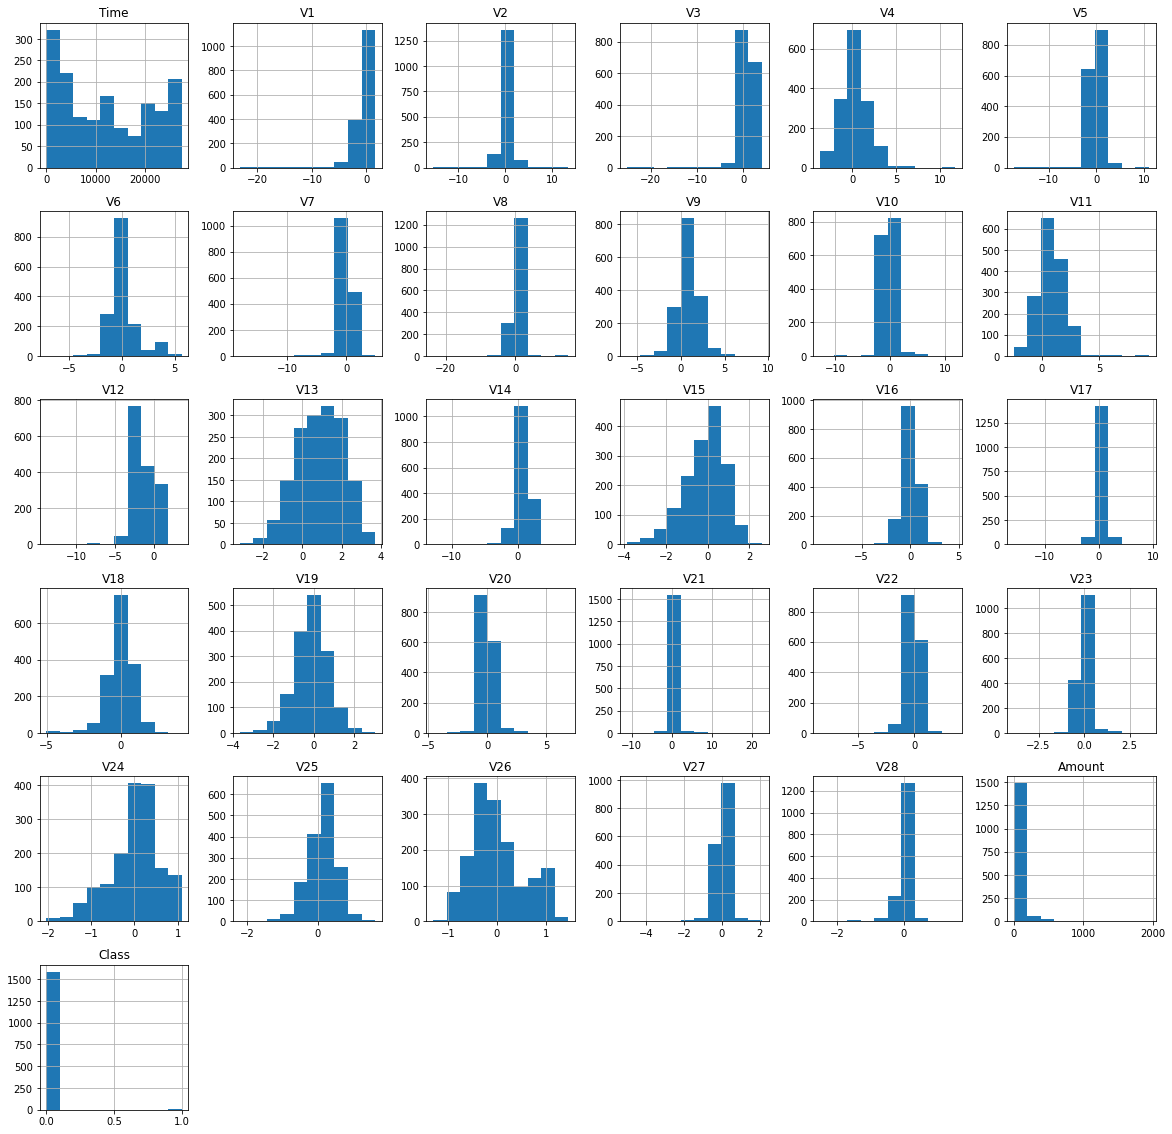

In [9]:
#Plot histograms of each parameter
data.hist(figsize = (20, 20))
plt.show()

In [10]:
#Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Cases: {}'.format(len(data[data['Class'] == 0])))

0.0056782334384858045
Fraud Cases: 9
Valid Cases: 1585


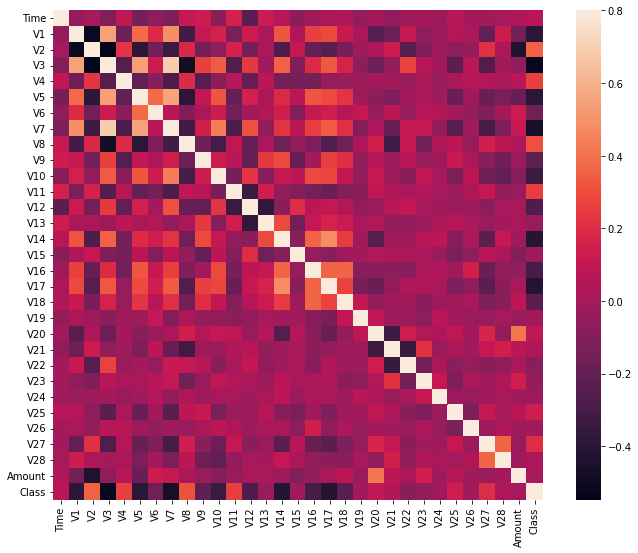

In [11]:
#Coreelation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [12]:
#Get all the columns from the dataFrame
columns = data.columns.tolist()

#Filter the columns to remove data we do not want
columns = [c for c in columns if c not in["Class"]]

#Store the variables we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

#Print shapes
print(X.shape)
print(Y.shape)

(1594, 30)
(1594,)


**3. UNSUPERVISED OUTLIER DETECTION**

In [13]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define random states
state = 1

#define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X), contamination = outlier_fraction, random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction)
}

In [16]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation Forest: 9
0.9943538268506901
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1585
         1.0       0.50      0.56      0.53         9

    accuracy                           0.99      1594
   macro avg       0.75      0.78      0.76      1594
weighted avg       0.99      0.99      0.99      1594

Local Outlier Factor: 19
0.9880803011292346
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1585
         1.0       0.00      0.00      0.00         9

    accuracy                           0.99      1594
   macro avg       0.50      0.50      0.50      1594
weighted avg       0.99      0.99      0.99      1594



<Figure size 648x504 with 0 Axes>